In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from umap import UMAP
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Load your data
file_path = 'processed_data/mean_centered_transposed_data.csv' 
data = pd.read_csv(file_path)
data.head()

,Element,SFE,-11.0,-10.9,-10.8,-10.7,-10.6,-10.5,-10.4,-10.3,...,7.1,7.2,7.3,7.4,7.5,7.6,7.7,7.8,7.9,8.0
0,Mo,300.0,-0.524447,-0.524447,-0.524447,-0.524447,-0.524447,-0.524447,-0.524447,-0.524447,...,-0.524447,-0.524447,-0.524447,-0.524447,-0.524447,-0.524447,-0.524447,-0.524447,-0.524447,-0.524447
1,Ta,200.0,-0.424482,-0.424482,-0.424482,-0.424482,-0.424482,-0.424482,-0.424482,-0.424482,...,-0.424482,-0.424482,-0.424482,-0.424482,-0.424482,-0.424482,-0.424482,-0.424482,-0.424482,-0.424482
2,W,5.0,-0.431907,-0.431907,-0.431907,-0.431907,-0.431907,-0.431907,-0.431907,-0.431907,...,-0.431907,-0.431907,-0.431907,-0.431907,-0.431907,-0.431907,-0.431907,-0.431907,-0.431907,-0.431907
3,Cu,45.0,-0.650140,-0.650140,-0.650140,-0.650140,-0.650140,-0.650140,-0.650140,-0.650140,...,-0.650140,-0.650140,-0.650140,-0.650140,-0.650140,-0.650140,-0.650140,-0.650140,-0.650140,-0.650140
4,Ni,125.0,-0.312160,-0.312160,-0.312160,-0.312160,-0.312160,-0.312160,-0.312160,-0.312160,...,-0.312160,-0.312160,-0.312160,-0.312160,-0.312160,-0.312160,-0.312160,-0.312160,-0.312160,-0.312160


In [3]:
# Extract Material and SFE columns
material_names = data['Element']
sfe_values = data['SFE']
numeric_data = data.drop(columns=['Element', 'SFE'])

In [4]:
# Define target and features
y = sfe_values
X = numeric_data

In [5]:
# Apply UMAP for dimensionality reduction
umap = UMAP(n_components=3, random_state=0, n_neighbors=5, min_dist=0.05)
X_umap = umap.fit_transform(X)

c:\Users\Tohid\anaconda3\envs\regression\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [6]:
import joblib

# Save the trained UMAP model to a file
umap_model_filename = 'trained_models/umap.pkl'
#joblib.dump(umap, umap_model_filename)

In [7]:
# Create a DataFrame with material names, SFE values, and UMAP dimensions
umap_data = pd.DataFrame(
    {
        "Element": material_names,
        "SFE": sfe_values,
        "UMAP1": X_umap[:, 0],
        "UMAP2": X_umap[:, 1],
        "UMAP3": X_umap[:, 2]
    }
)
#umap_data.to_csv("results/umap_data.csv", index=False)
umap_data

,Element,SFE,UMAP1,UMAP2,UMAP3
0,Mo,300.0,4.620070,7.567972,3.483931
1,Ta,200.0,4.907683,6.604737,2.474618
2,W,5.0,4.025685,7.954389,2.751085
3,Cu,45.0,3.526798,7.645772,1.853904
4,Ni,125.0,3.676206,6.505085,3.005543
5,Pd,180.0,4.049037,7.193638,1.776394
6,Cd,15.0,4.246208,6.984491,2.803802
7,Co,31.0,3.185967,7.010437,2.335170
8,Ru,200.0,3.526139,6.866157,1.733634
9,Ti,310.0,5.114885,6.635008,3.613473


In [8]:
import matplotlib as mpl


# Extract columns
elements = umap_data["Element"]
sfe = umap_data["SFE"]
umap1 = umap_data["UMAP1"]
umap2 = umap_data["UMAP2"]
umap3 = umap_data["UMAP3"]

# Create a color map based on SFE values
cmap = plt.cm.viridis
norm = mpl.colors.Normalize(vmin=sfe.min(), vmax=sfe.max())
colors = cmap(norm(sfe))

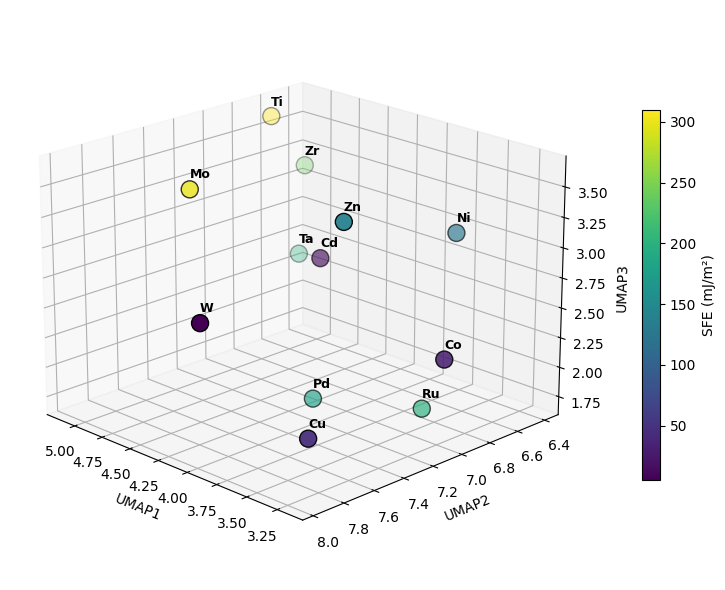

In [9]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot with spherical-like appearance
sc = ax.scatter(umap1, umap2, umap3, c=colors, s=150, edgecolor='k', marker='o')

# Add a colorbar to show SFE scale with height control
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, shrink=0.65, pad=0.08)  # Adjust shrink and pad
cbar.set_label('SFE (mJ/m²)', fontsize=10, weight='normal')  # Bold colorbar label

# Label axes with bold text
ax.set_xlabel('UMAP1', fontsize=10, weight='normal')
ax.set_ylabel('UMAP2', fontsize=10, weight='normal')
ax.set_zlabel('UMAP3', fontsize=10, weight='normal')

# Add element text labels near points for clarity
for i, elem in enumerate(elements):
    ax.text(umap1[i], umap2[i], umap3[i] + 0.09, elem, fontsize=9, weight='bold')  # Bold text labels

# Grid customization
ax.grid(True, linestyle=':', linewidth=0.5)  # Dotted lines with smaller thickness

# Set initial rotation view
ax.view_init(elev=20, azim=135)  # Adjust angles as needed

plt.tight_layout()
#plt.savefig("results/SFE_umap_3d_scatter.png", dpi=1000, bbox_inches='tight')
plt.show()

In [10]:
# Split the data
#X_train, X_test, y_train, y_test = train_test_split(X_umap, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Extract all features and targets before splitting
X_all = umap_data[["UMAP1", "UMAP2", "UMAP3"]]
y_all = umap_data["SFE"]

# Apply scaling to the entire dataset
scaler = StandardScaler()
X_all_scaled = scaler.fit_transform(X_all)

# Save the trained scaler to a file
scaler_filename = 'trained_models/standard_scaler.pkl'
joblib.dump(scaler, scaler_filename)

# Split the scaled data into train and test sets
test_elements = ["Zn", "Zr", "Ni", "Ta"]
train_data = umap_data[~umap_data["Element"].isin(test_elements)]
test_data = umap_data[umap_data["Element"].isin(test_elements)]

X_train_scaled = X_all_scaled[~umap_data["Element"].isin(test_elements)]
X_test_scaled = X_all_scaled[umap_data["Element"].isin(test_elements)]

y_train = train_data["SFE"]
y_test = test_data["SFE"]

# Convert scaled data back into DataFrames for better visualization
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=["UMAP1", "UMAP2", "UMAP3"], index=train_data["Element"])
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=["UMAP1", "UMAP2", "UMAP3"], index=test_data["Element"])

In [14]:
# Rename ET variables to RF for clarity (Extra Trees replaced with Random Forest)
rf_model = RandomForestRegressor(n_estimators=500, random_state=0)
rf_model.fit(X_train_scaled, y_train)

# Save the trained Random Forest model to a file
rf_model_filename = 'trained_models/random_forest_model.pkl'
joblib.dump(rf_model, rf_model_filename)

# Predictions for train, test, and full dataset
rf_y_pred_test = rf_model.predict(X_test_scaled)
rf_y_pred_train = rf_model.predict(X_train_scaled)
rf_y_pred_all = rf_model.predict(X_all_scaled)

# Calculate R² and MAE for train, test, and overall datasets
rf_r2_test = r2_score(y_test, rf_y_pred_test)
rf_mae_test = mean_absolute_error(y_test, rf_y_pred_test)

rf_r2_train = r2_score(y_train, rf_y_pred_train)
rf_mae_train = mean_absolute_error(y_train, rf_y_pred_train)

rf_r2_all = r2_score(y_all, rf_y_pred_all)
rf_mae_all = mean_absolute_error(y_all, rf_y_pred_all)

# Output R² and MAE values
print("R² (Test):", rf_r2_test)
print("MAE (Test):", rf_mae_test)
print("R² (Train):", rf_r2_train)
print("MAE (Train):", rf_mae_train)
print("R² (Overall):", rf_r2_all)
print("MAE (Overall):", rf_mae_all)

R² (Test): 0.8557650653829322
MAE (Test): 15.46
R² (Train): 0.8611952008678042
MAE (Train): 39.655249999999995
R² (Overall): 0.8656005760750624
MAE (Overall): 31.590166666666665


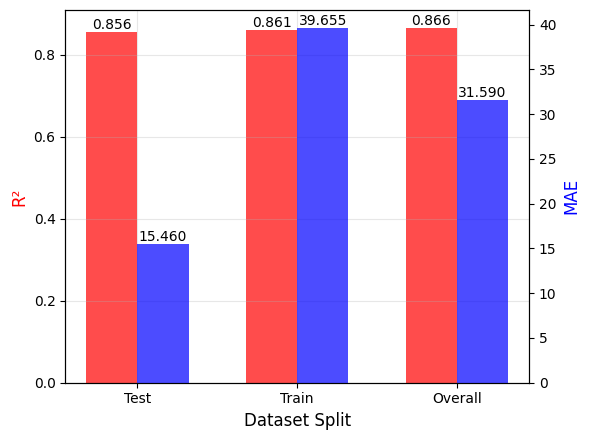

In [15]:
# Data for R² and MAE values
categories = ['Test', 'Train', 'Overall']
r2_values = [rf_r2_test, rf_r2_train, rf_r2_all]
mae_values = [rf_mae_test, rf_mae_train, rf_mae_all]

x = np.arange(len(categories))  # the label locations
width = 0.32  # the width of the bars

# Create the figure and the bar plot
fig, ax1 = plt.subplots(figsize=(6, 4.5))

# Plot R² values
bars1 = ax1.bar(x - width/2, r2_values, width, label='R²', color='red', alpha=0.7)

# Plot MAE values on a secondary y-axis
ax2 = ax1.twinx()
bars2 = ax2.bar(x + width/2, mae_values, width, label='MAE', color='blue', alpha=0.7)

# Add labels, titles, and legends
ax1.set_xlabel('Dataset Split', fontsize=12)
ax1.set_ylabel('R²', fontsize=12, color='red')
ax2.set_ylabel('MAE', fontsize=12, color='blue')
ax1.set_xticks(x)
ax1.set_xticklabels(categories)
#ax1.legend(bars1, ['R²'], loc='upper left')
#ax2.legend(bars2, ['MAE'], loc='upper right')

# Add gridlines for better readability
ax1.grid(alpha=0.3)

# Add values on top of bars
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height, f"{height:.3f}", ha='center', va='bottom', fontsize=10, color='black')

for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, height, f"{height:.3f}", ha='center', va='bottom', fontsize=10, color='black')

# Display the plot
plt.tight_layout()
#plt.savefig("figures/R2MAE_bar_plot.png", dpi=500)
plt.show()

In [ ]:
umap_predictions = pd.DataFrame()
umap_predictions["Element"] = material_names
umap_predictions["Actual_SFE"] = sfe_values
umap_predictions["umap_predicted"] = rf_y_pred_all
umap_predictions

,Element,Actual_SFE,umap_predicted
0,Mo,300.0,213.846
1,Ta,200.0,187.994
2,W,5.0,26.426
3,Cu,45.0,81.018
4,Ni,125.0,118.582
5,Pd,180.0,142.882
6,Cd,15.0,67.954
7,Co,31.0,47.960
8,Ru,200.0,166.766
9,Ti,310.0,276.622


In [18]:
# Define the crystal structure data
crystal_data = {
    "Mo": "BCC",
    "Ta": "BCC",
    "W": "BCC",
    "Cu": "FCC",
    "Ni": "FCC",
    "Pd": "FCC",
    "Cd": "HCP",
    "Co": "HCP",
    "Ru": "HCP",
    "Ti": "HCP",
    "Zn": "HCP",
    "Zr": "HCP"
}

# Add the structure type to the UMAP prediction data
umap_predictions["Structure"] = umap_predictions["Element"].map(crystal_data)
umap_predictions["Factor"] = umap_predictions["Actual_SFE"]/umap_predictions["umap_predicted"]
umap_predictions

,Element,Actual_SFE,umap_predicted,Structure,Factor
0,Mo,300.0,213.846,BCC,1.402879
1,Ta,200.0,187.994,BCC,1.063864
2,W,5.0,26.426,BCC,0.189208
3,Cu,45.0,81.018,FCC,0.555432
4,Ni,125.0,118.582,FCC,1.054123
5,Pd,180.0,142.882,FCC,1.259781
6,Cd,15.0,67.954,HCP,0.220738
7,Co,31.0,47.960,HCP,0.646372
8,Ru,200.0,166.766,HCP,1.199285
9,Ti,310.0,276.622,HCP,1.120663


In [19]:
#umap_predictions.to_excel("predictions/umap_predictions.xlsx", index=False)

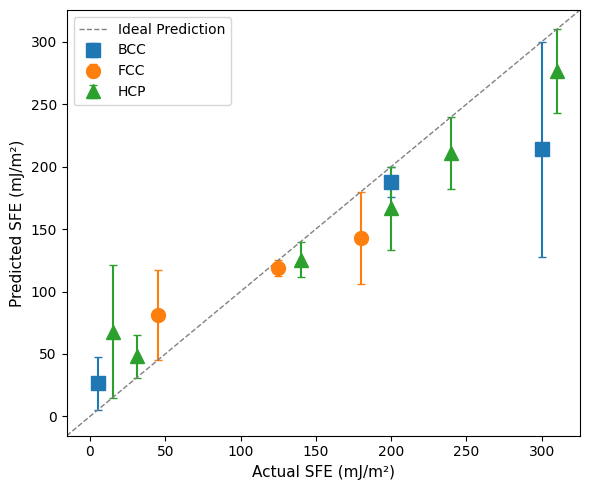

In [20]:
# Define marker shapes for different crystal structures
markers = {
    'FCC': 'o',
    'BCC': 's',
    'HCP': '^',
    'Diamond Cubic': 'D',
    'Spinel Cubic': 'P',
    'Cubic': '*'
}

# Group the data by crystal structure
grouped = umap_predictions.groupby('Structure')

# Plot for Random Forest predictions
plt.figure(figsize=(6, 5))
for structure, group in grouped:
    plt.errorbar(
        group['Actual_SFE'],  # Actual values
        group['umap_predicted'],  # RF Predicted values
        yerr=abs(group['umap_predicted'] - group['Actual_SFE']),  # Error bars
        fmt=markers.get(structure, 'x'),  # Marker shape
        markersize=10,  # Larger point size
        label=structure,  # Legend label
        capsize=3,
        linestyle='none'
    )
plt.xlabel('Actual SFE (mJ/m²)', fontsize=11)
plt.ylabel('Predicted SFE (mJ/m²)', fontsize=11)
plt.axline((0, 0), slope=1, color='gray', linestyle='--', linewidth=1, label='Ideal Prediction')
plt.legend(fontsize=10)
#plt.grid(alpha=0.6, linestyle=':')  # Dotted grid lines
plt.tight_layout()
#plt.savefig("predictions/RandonForest_regression.png", dpi=1000)
plt.show()

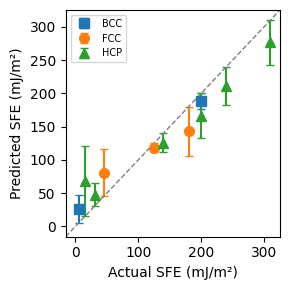

In [21]:
# Assuming 'umap_predictions' is a DataFrame with the required columns
# Filter out 'Mo' from the dataset
filtered_umap_predictions = umap_predictions[umap_predictions['Element'] != 'Mo']

# Define marker shapes for different crystal structures
markers = {
    'FCC': 'o',
    'BCC': 's',
    'HCP': '^',
    'Diamond Cubic': 'D',
    'Spinel Cubic': 'P',
    'Cubic': '*'
}

# Group the data by crystal structure
grouped = filtered_umap_predictions.groupby('Structure')

# Plot for Random Forest predictions
plt.figure(figsize=(3, 3))
for structure, group in grouped:
    plt.errorbar(
        group['Actual_SFE'],  # Actual values
        group['umap_predicted'],  # RF Predicted values
        yerr=abs(group['umap_predicted'] - group['Actual_SFE']),  # Error bars
        fmt=markers.get(structure, 'x'),  # Marker shape
        markersize=7,  # Larger point size
        label=structure,  # Legend label
        capsize=3,
        linestyle='none'
    )

plt.xlabel('Actual SFE (mJ/m²)', fontsize=10)
plt.ylabel('Predicted SFE (mJ/m²)', fontsize=10)
plt.axline((0, 0), slope=1, color='gray', linestyle='--', linewidth=1)
plt.legend(fontsize=7)
plt.tight_layout()
plt.show()

In [22]:
params = [rf_r2_test, rf_r2_train, rf_r2_all]
param_names = ["Test R2", "Train R2", "Overall R2"]
for param, param_name in zip(params, param_names):
    print(f"{param_name}: {param}")

Test R2: 0.8557650653829322
Train R2: 0.8611952008678042
Overall R2: 0.8656005760750624


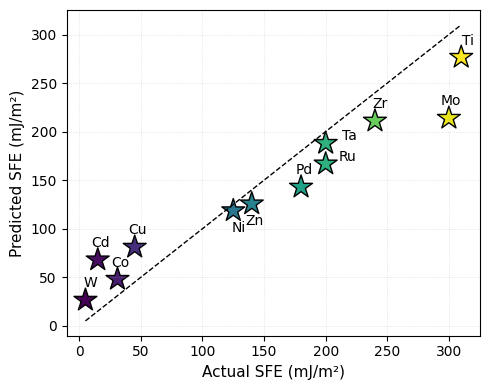

In [23]:
# Plot Actual vs Predicted for the entire dataset
plt.figure(figsize=(5, 4.0))

# Scatter plot with custom colors and marker
scatter = plt.scatter(y_all, rf_y_pred_all, c=sfe, cmap=cmap, norm=norm, s=300, marker="*", edgecolor='k', label="SFE")

# Add an ideal line for reference
plt.plot([y_all.min(), y_all.max()], [y_all.min(), y_all.max()], color="black", linestyle="--", label="Ideal Line", lw=1)


# Add element names as annotations
for i, element in enumerate(umap_data["Element"]):
    if element in ['W', 'Co', 'Cd', 'Cu', 'Ti', 'Mo', 'Zr', 'Pd']:
        plt.text(y_all.iloc[i] + 10, rf_y_pred_all[i] + 10, element, fontsize=10, ha='right', va='bottom')
    elif element in ['Ni', 'Zn']:
        plt.text(y_all.iloc[i] + 10, rf_y_pred_all[i] - 25, element, fontsize=10, ha='right', va='bottom')
    else:
        plt.text(y_all.iloc[i] + 25, rf_y_pred_all[i] + 0, element, fontsize=10, ha='right', va='bottom')

# Label axes
plt.xlabel("Actual SFE (mJ/m²)", fontsize=11)
plt.ylabel("Predicted SFE (mJ/m²)", fontsize=11)

# Add legend and grid
#plt.legend()
plt.grid(alpha=0.5, ls=':', lw=0.5)

# Adjust layout to prevent clipping
plt.tight_layout()

# Uncomment to save the figure
plt.savefig("figures/actual_vs_predicted_plot.png", dpi=1000, bbox_inches='tight')

plt.show()

In [26]:
from sklearn.utils import resample

# Create bootstrap samples
bootstrap_models = []
for i in range(5):  # Use 5 bootstrap samples
    X_bootstrap, y_bootstrap = resample(X_train_scaled, y_train, random_state=i)
    rf_model_bootstrap = RandomForestRegressor(n_estimators=1000, random_state=i)
    rf_model_bootstrap.fit(X_bootstrap, y_bootstrap)
    bootstrap_models.append(rf_model_bootstrap)

# Predict using all models
bootstrap_predictions = np.array([model.predict(X_all_scaled) for model in bootstrap_models])
mean_prediction = bootstrap_predictions.mean(axis=0)
std_prediction = bootstrap_predictions.std(axis=0)

# Sort y_all for proper plotting
sorted_indices = np.argsort(y_all)
y_all_sorted = np.array(y_all)[sorted_indices]
mean_prediction_sorted = mean_prediction[sorted_indices]
std_prediction_sorted = std_prediction[sorted_indices]

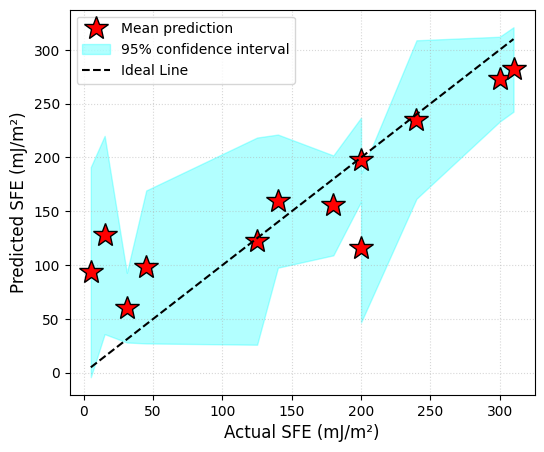

In [27]:
# Plot
plt.figure(figsize=(6, 5))
plt.plot(y_all_sorted, mean_prediction_sorted, '*', label="Mean prediction", color='red', markersize=18, markeredgecolor='k')
plt.fill_between(
    y_all_sorted,
    mean_prediction_sorted - 2 * std_prediction_sorted,
    mean_prediction_sorted + 2 * std_prediction_sorted,
    color='cyan',
    alpha=0.3,
    label="95% confidence interval"
)
plt.plot([min(y_all), max(y_all)], [min(y_all), max(y_all)], color="black", linestyle="--", label="Ideal Line", lw=1.5)
plt.xlabel("Actual SFE (mJ/m²)", fontsize=12)
plt.ylabel("Predicted SFE (mJ/m²)", fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.5, ls=':')
#plt.title("Random Forest Predictions with Bootstrap Uncertainty")
plt.show()

The uncertainty in Random Forest predictions was quantified using a bootstrap-based approach, which involves resampling the training data to create multiple subsets (bootstrap samples), training separate Random Forest models on each subset, and aggregating their predictions. For each input, the mean of the predictions from the ensemble of models represents the central prediction, while the standard deviation provides a measure of uncertainty.
The results show that the model achieves accurate predictions for higher SFE values (e.g., above 200), where the mean predictions closely align with the ideal prediction line and the 95% confidence intervals are narrow, indicating high model confidence. In contrast, for lower SFE values (e.g., 5–45), the confidence intervals widen significantly. This higher uncertainty may be due to the limited representation of these cases in the training data in this range.